## Agenda

1. Introduction

    - 1.1 Reading the Dataset
    

2. Univariate Vizualization

    - 2.1 Quantitative Features (Numerical)
    
    - 2.2 Qualitative Features (Categorical & Binary)
    
3. Multivariate Visualization

    - 3.1 Quantitativ vs. Quantitative (Numerical vs. Numerical)
   
    - 3.2 Quantitative vs. Qualitative (Numerical vs. Categorical)
    
    - 3.3 Qualitative vs. Qualitative (Categorical vs. Categorical)
    

### Introduction

This notebok denoted various visualisation approaches using Matplotlib and Seaborn inorder to achieve a deeper understanding of the Loan Approval dataset.

Let's initialize our environment:

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

#### 1.1 Reading the Dataset
I will start my analysis by reading the .csv file by calling "pandas.read_csv". The dataset is from Kaggle and is about the bank loan approval. 

In [138]:
df = pd.read_csv('Bank_loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Now, let's look at some important details about our dateset. I'd like to call this introduction part of our dateset. This details provides a quick understanding of our bank loan dateset.

In [139]:
df.shape

(614, 13)

In [140]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### 2. Univariate Visualization

The Univariate analysis looks at one feature at a time. The goal is learn something about the distribution, central tendency and spread of each attributes.

### 2.1 Quantitative Features:

Quantitative features deals with numbers and things you can measure objectively. There are two types of quantitative data also known as numerical data: discrete and continuous. The general concept is, **counts** are discrete and **measurements** are continuous.

#### Histograms

The simplest way to look at a numerical variable's distribution is to plot its histogram using the DataFrame's method hist().

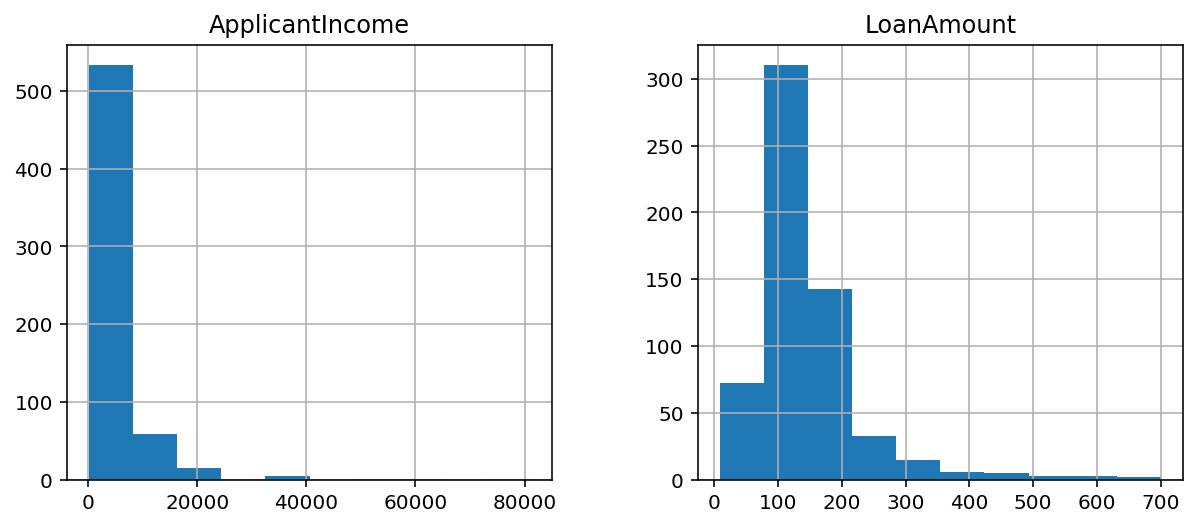

In [142]:
features = ['ApplicantIncome','LoanAmount']
df[features].hist(figsize=(10, 4));

Histograms provide a bar chart of a numeric attribute split into bins with the height showing the number of instances that fall into each bin. The histogram shape may contain hints about the underlying distribution: Gaussian, exponential, etc. Also, you can notice some skewedness in their shapes. We can see in the above plots that non of our plots is not normally distributed. Both of them have a long tail toward right known as a **positive skewness**.

#### Density Plots 

Density plots or Kernel Density Plots formally are another type of plots that we use for numerical variables. It uses the Kernel Density Function (KDE) for displaying the variables distribution. It's the smoother version of Histogram plot and its main advantage is that it's not dependent on the bins. Let's create density plots for the same two variables:

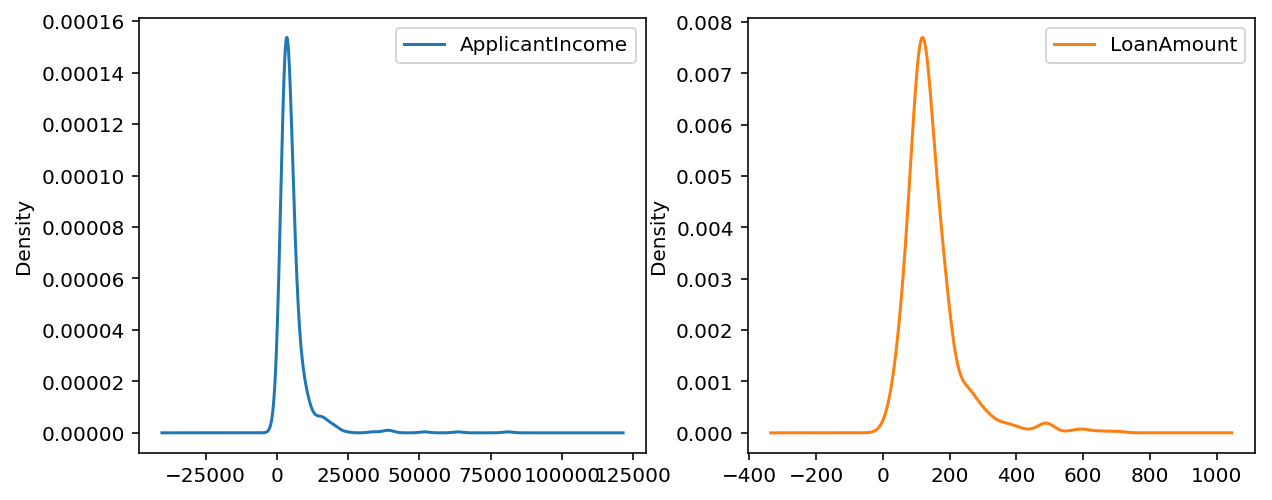

In [143]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

There is another way which we can combine the distribution (histogram) plot and the kernel density estimate (kde) both at the same time. Inorder to do so, we can use seaborn.distplot (). Below, we will use this method for ApplicantIncome. 

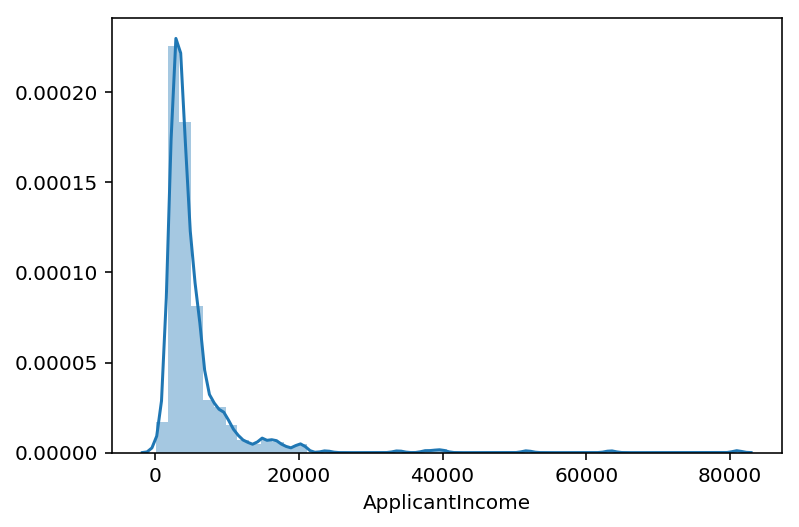

In [144]:
sns.distplot(df['ApplicantIncome']);

#### Box Plot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. It consists of one box showing the interquartile spread of the distribution, two whiskers showing the spread of our entire data, and possible outliers that are black data points outside the whiskers. You can get a better understanding of the box plot in the following picture. 

<center><img src='boxplot.png'  width="900"></center>

Now let's try box plot using Seaborn library on our own dataset.

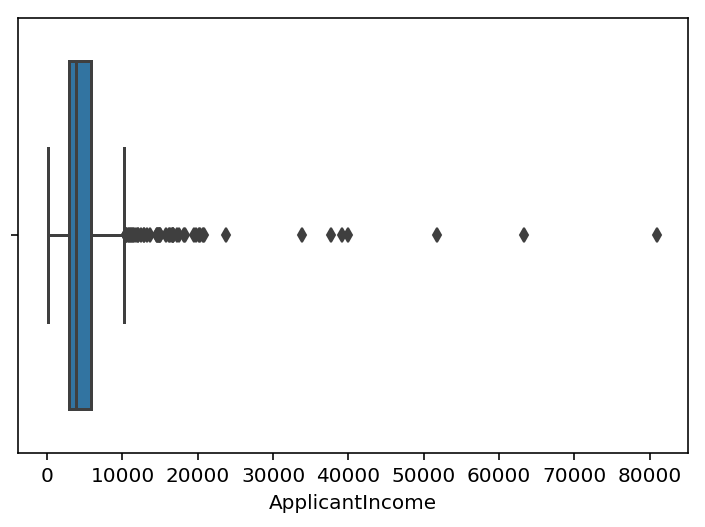

In [145]:
sns.boxplot(x='ApplicantIncome', data=df)

#### Violin Plot

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. It shows the density distribution of the data at different value which smoothed by kernel density estimator (kde). Ususally, violin plot enclude all the data in the plot. The median is the white dot, the black rectangle is the interquartile range, and all sample points. In reality, violin plot provides more details in most cases as compared to the box plot. 

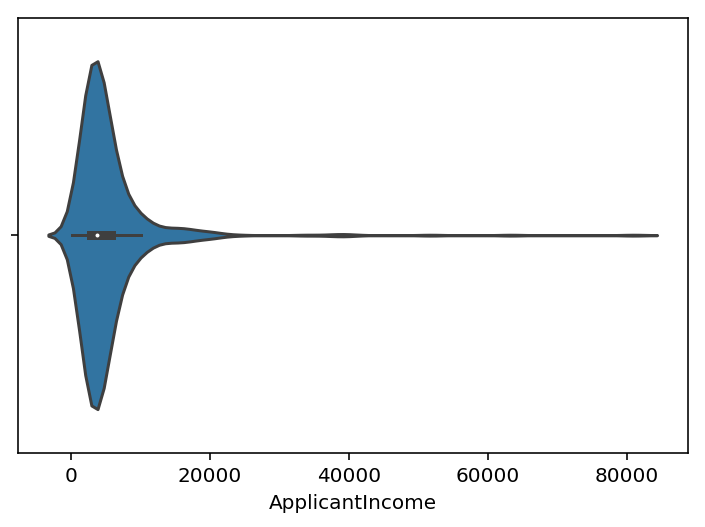

In [146]:
sns.violinplot(x='ApplicantIncome', data=df)

#### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method describe() of a DataFrame:

In [147]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Its output is mostly self-explanatory. 25%, 50% and 75% are the corresponding percentiles.

### 2.2 Quantitative Features:

Qualitative features deals with cathegorical variables. In fact, when you classify or cathegorize your data, you create qualitative or attribute data.

Qualitative data divides into three categories:

1. Binary: Binary data place things in one of two mutually exclusive categories sucha as, Yes/No, True/False, Female/Male, Success/Failure.

2. Nominal: Nominal data assigns individual items to named categories that do not have an implicit or natural value or rank such as, city names, color names, addresses, hair colors. 

3. Ordinal: In the ordinal data, items are allocated to categories that do have some kind of implicit or natural order, such as, Small/Medium/Large, customer satisfaction scale from 1 to 10.  

#### Frequency Table

Lets check the class balance in our target variable. Loan_Status shows the distribution of our classes. We will get frequency table which shows how frequent each value of the categorical value is. For this, we will use the value_counts() method:

In [148]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

By default, the output entries are ordered based on the values that occur most frequent to the least frequent.

Accordingly, the frequency table shows that out of 614 (422 + 192=614) customers who applied for the loan, 422 approved for the loan (Y:422) and 192 did not approved for the loan (N:192).

#### Bar Plot 

Bar plot is the graphical representation of the frequency table. We can use the seaborn function *countplot()* to create bar plot. It is worth mentioning that the countplot and barplot in seaborn performs two different functions. The *countplot()* counts the observations in each categorical bins using bars, while *barplot()* mostly used for representation of basic statistics of numerical values grouped by categorical features. 

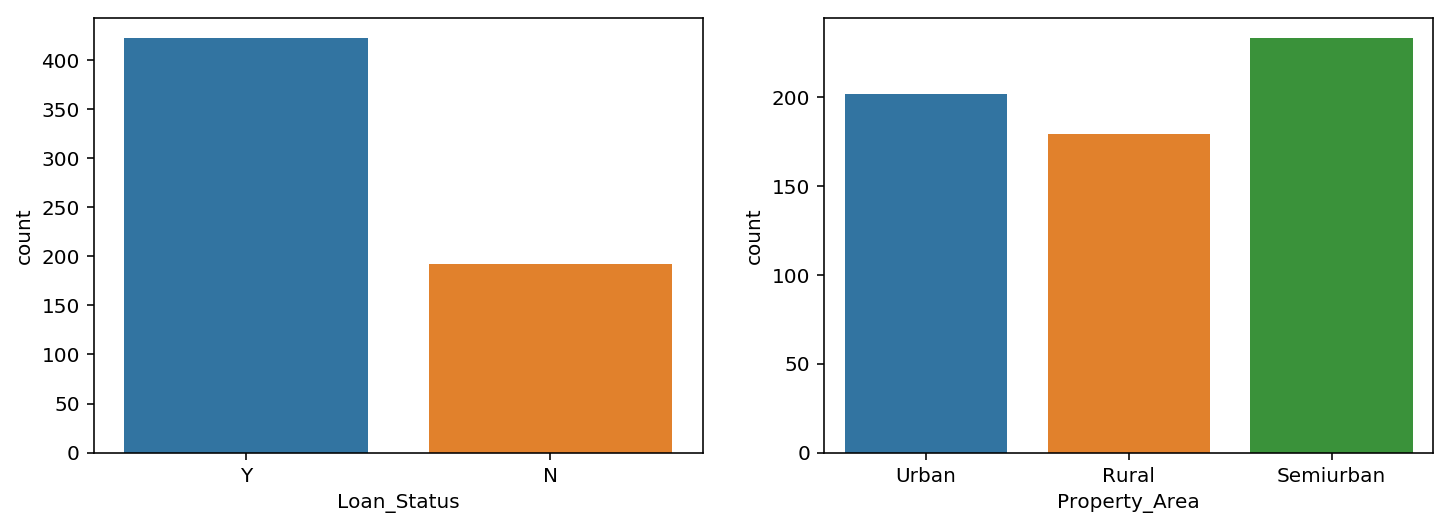

In [149]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Loan_Status', data=df, ax=axes[0]);
sns.countplot(x='Property_Area', data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

1. Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables, the bars are usually ordered by variable value.

The chart at the left above shows the distribution of customers who approved for the loan and did not approved for the loan.

The chart at the right above displays the counts of each Propety area who applied for the loan.

## 3. Multivariate Visualization

The Multivariate Visualization lets us visualise the relationships between two or more variables all in one figure. Again, just as in Univarite Visualization, the visualisation type will depend on the variable type being analyzed.

### 3.1 Quantitativ vs. Quantitative (Numerical vs. Numerical)

#### Correlation Matrix

First, let's take a look at the correlation of the numerical variables in our dataset. This information is really important to know as some of the Machine Learning algorithms like Linear Regression or Logestic Regression are not able to handle highly correlated input variable well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

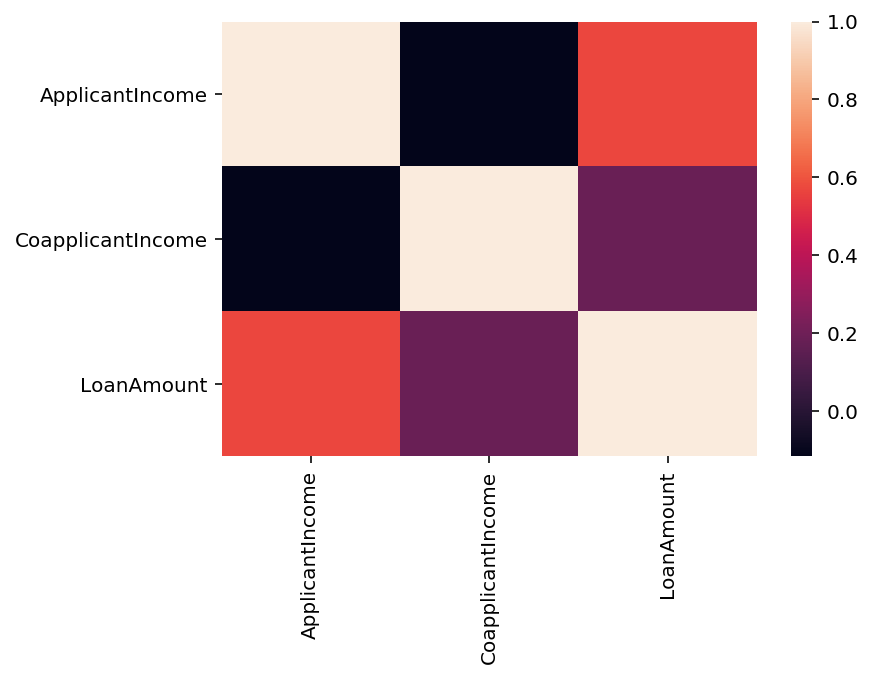

In [150]:
# Drop non-numerical variables
num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# Calculate and plot
corr_matrix = num.corr()
sns.heatmap(corr_matrix)

From the above heatmap, we can understand that the Loan Amount is correlated with the Applicant Income and Co-Applicant Income. 

#### Scatter Plot

The Scatter Plot displays values of two numerical variables as *Cartesian coordinates* in 2D space. It is also possible to visualize the  Scatter plots in 3D.

Let's see how the function *Scatter()* from Matplotlib works. 

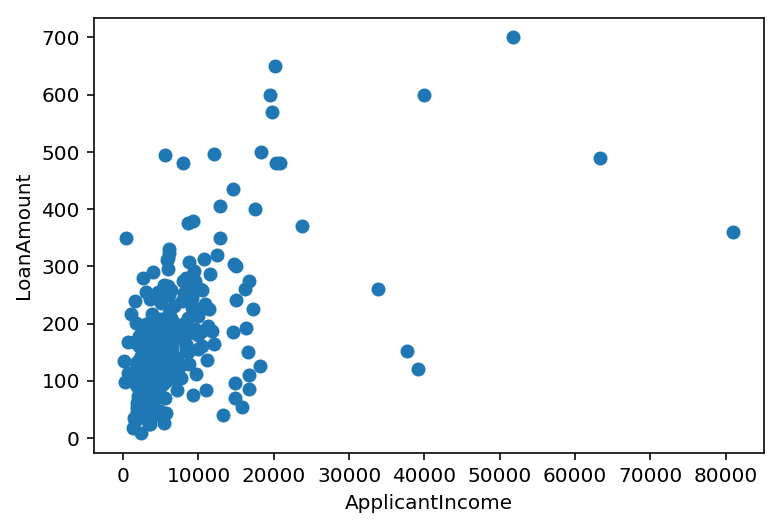

In [151]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount']);
plt.xlabel('ApplicantIncome');
plt.ylabel('LoanAmount');

We can see that for the ApplicantIncome the distribution of our dataset is mostly between 0 and 12000 and for the LoanAmount between 0 and 300.

Creating a scatter plot with the seaborn library is a slightly fancier option. There are various types of of plot to draw such as 'scatter', 'kde', 'reg', 'reside', 'hex'. The 'scatter' and 'kde' are applied in the following.

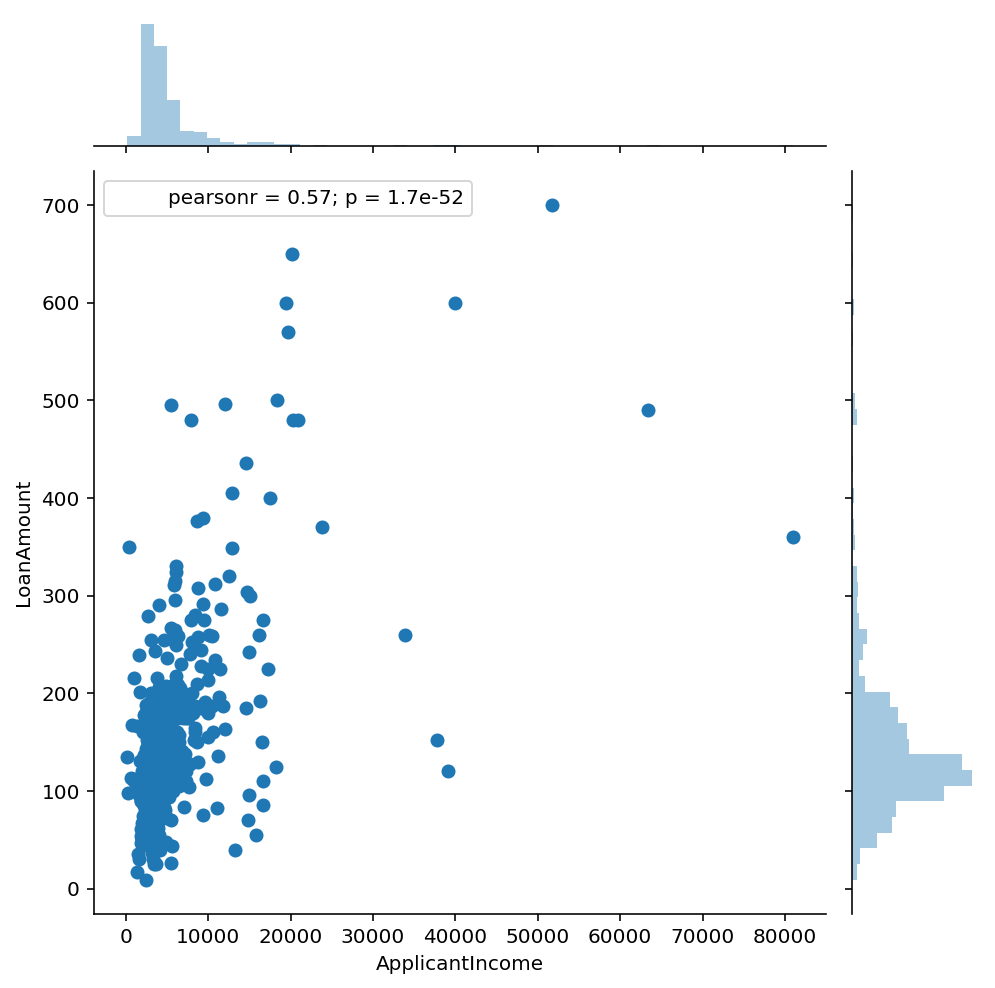

In [152]:
# With 'scatter'
sns.jointplot(x=df['ApplicantIncome'], y=df['LoanAmount'], kind='scatter', size=7);

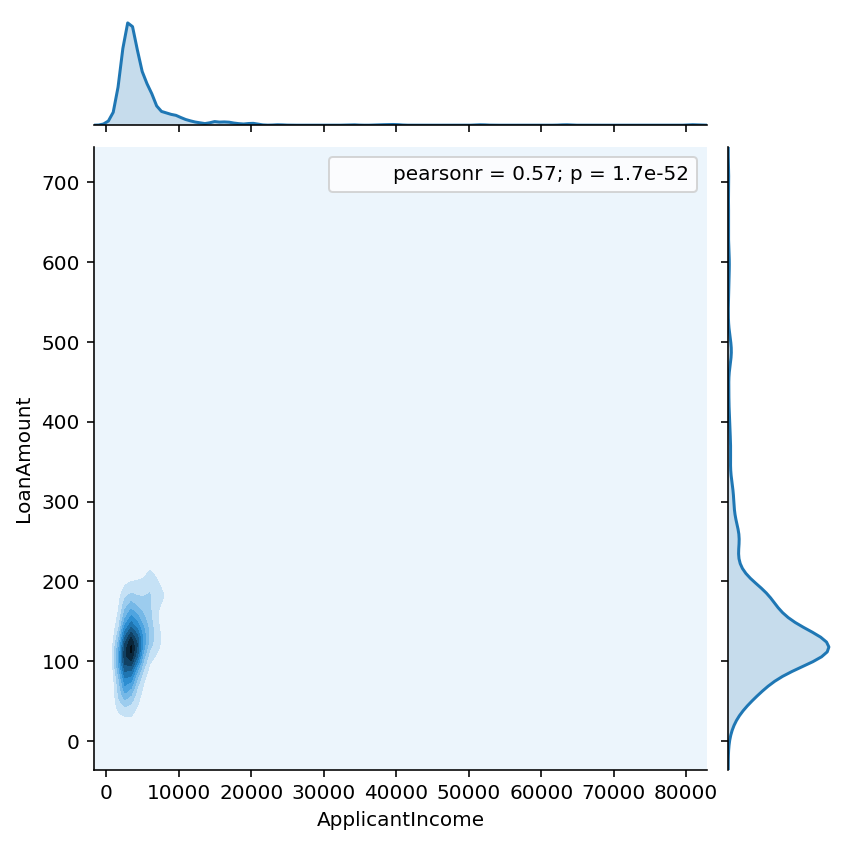

In [153]:
# With 'kde'
sns.jointplot(x=df['ApplicantIncome'], y=df['LoanAmount'], kind='kde');

This is basically a bivariate version of the Kernel Density Plot discussed earlier.

#### ScatterPlot Matrix

Sometimes, to draw some conclusion from the dataset, we need to use *pairplot()* from Seaborn. The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

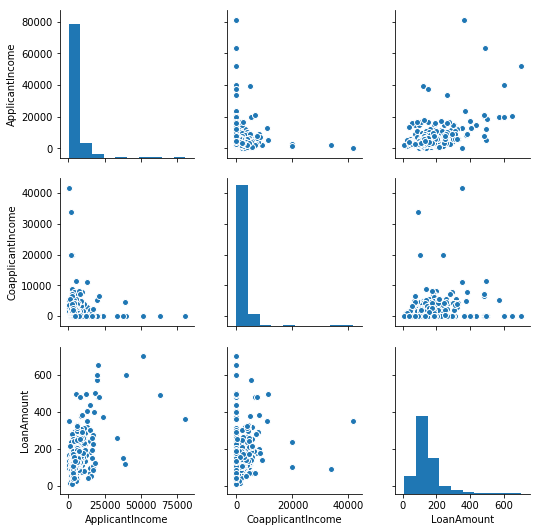

In [154]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(num);

#### 3.2 Quantitative vs. Qualitative (Numerical vs. Categorical)

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for Loan_Status from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Loan_Status.

Scatter plots explained clearly in the previous sections. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the scatter() function seen above, but, let's try a new function called lmplot() and use the parameter hue to indicate our categorical feature of interest:

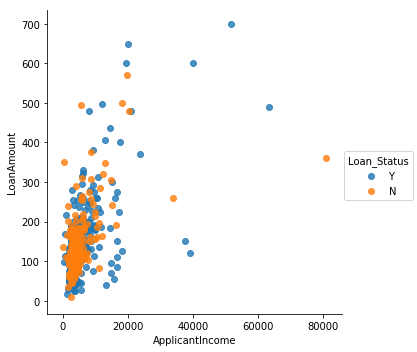

In [155]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=df, hue='Loan_Status', fit_reg=False);

It seems that a portion of the customer whom their application did not approved (orang dots) had income less than 10000 and applied for the higher loan amount. 

Now, Let's create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the customers who their loan approved (Loan_Status=Y) and customers who their loan did not approved (Loan_Status=N).

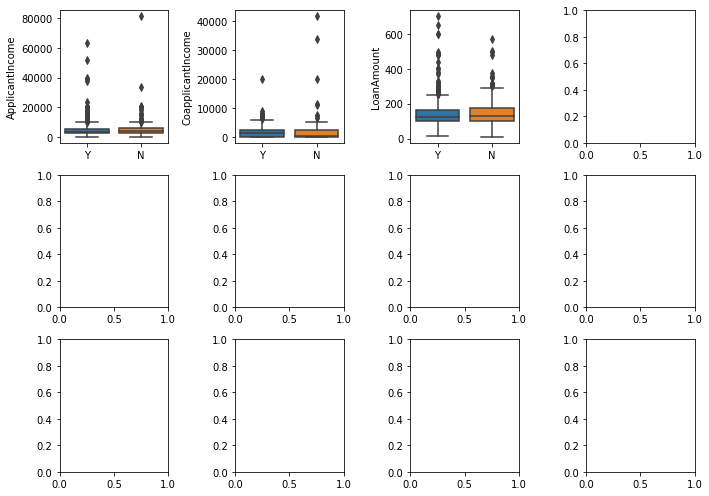

In [156]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(num):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Loan_Status', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

We did not see any big discrepancy distribution above.

Now, let's look at the  distribution of ApplicantIncome separately.

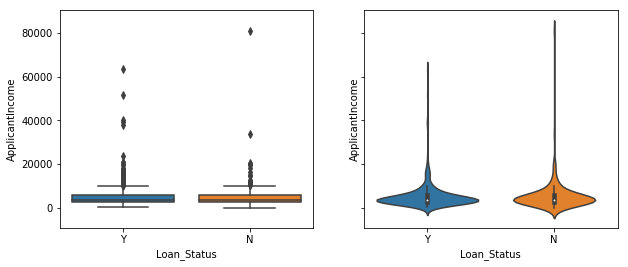

In [157]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, ax=axes[0]);
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df, ax=axes[1]);

Again, the boxplot and violin plot does not show any big discrepancy in their distribution.

#### 3.3 Qualitative vs. Qualitative (Categorical vs. Categorical)

Now, we are investigating more on nominal and ordinal data types in our dataset. Let's see the relationship between the Property_Area and Loan_Status.

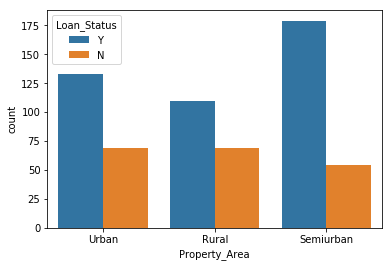

In [158]:
sns.countplot(x= 'Property_Area', data=df, hue='Loan_Status');

The above plot shows customer who applied for purchasing property in Semiurban are have a higher rate for loan approvel. 

Now, let's see the relationship between two binary features namely Education: graduate/not graduate and Gender: Female/Male with the Loan_Status.

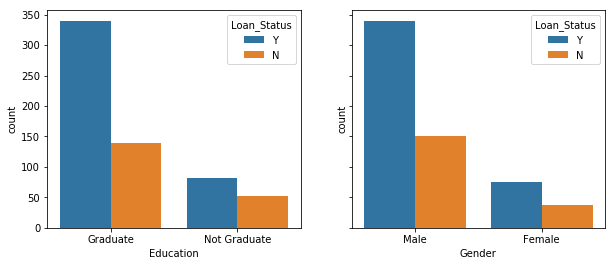

In [159]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='Education',data=df, hue='Loan_Status', ax=axes[0]);
sns.countplot(x='Gender', data=df, hue='Loan_Status', ax=axes[1]);

It was not huge surprise here that customers with higher education  had more approval rates and also that male customers approved for the loan much better than female customers.

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a cross tabulation. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how Loan_Status is related to the categorical variable 'Married' by creating a cross tabulation:

#### Contingency table

In [160]:
pd.crosstab(df['Loan_Status'], df['Married'])

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


The contingency table indicates that Married customers approved for the loan better than not married customers.